In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

data and feature descriptions taken from kaggle site: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data

In [90]:
boston_data = pd.read_csv('boston.csv')
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [91]:
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# EDA

In [92]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


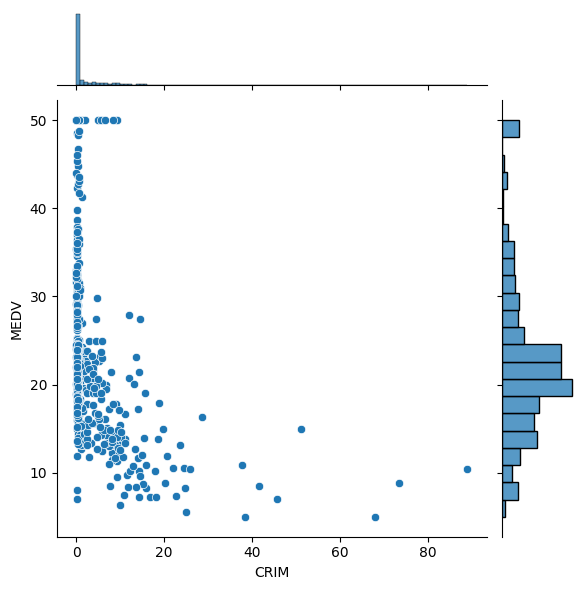

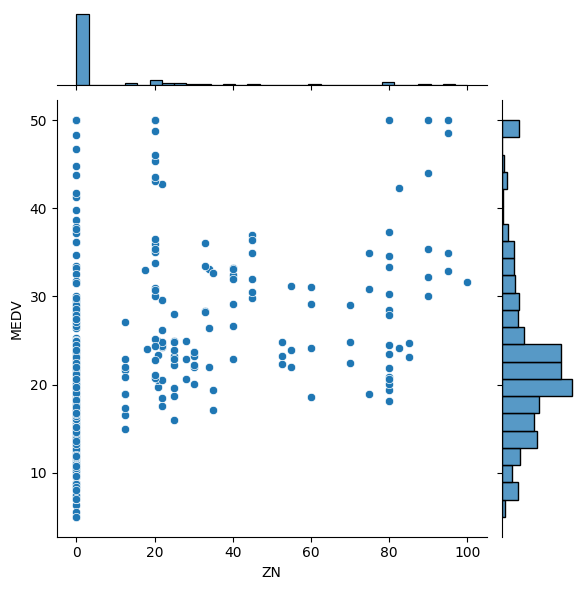

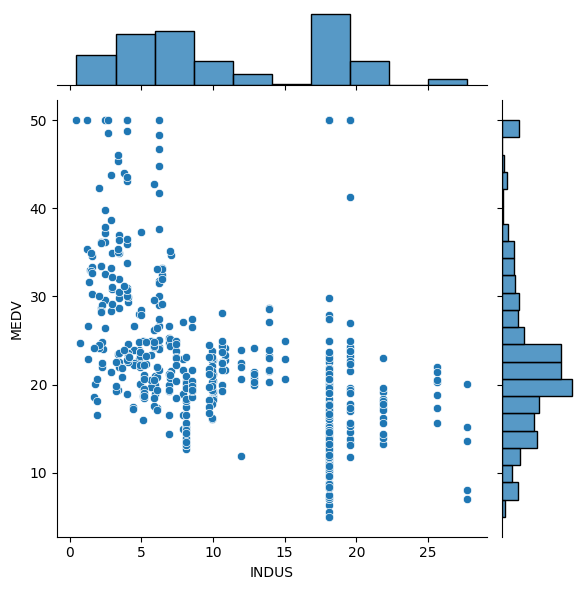

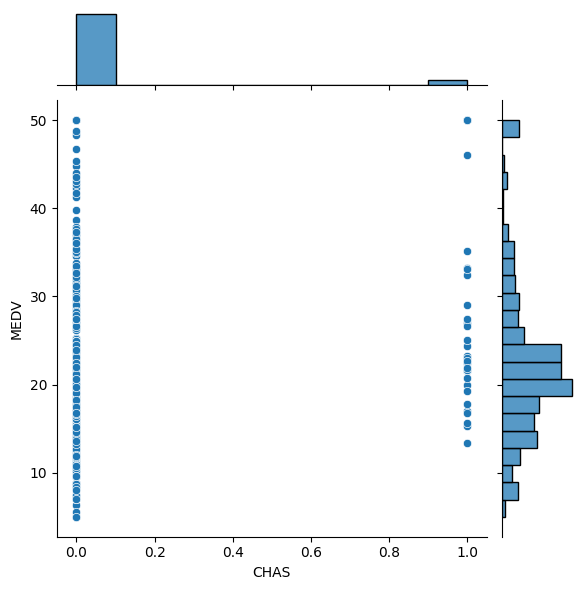

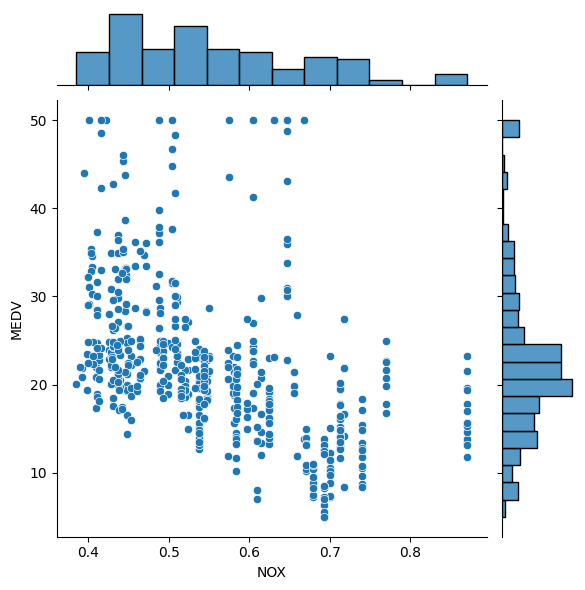

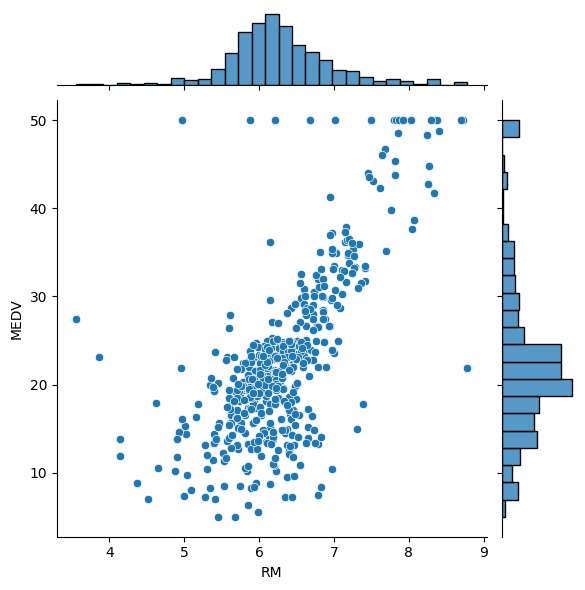

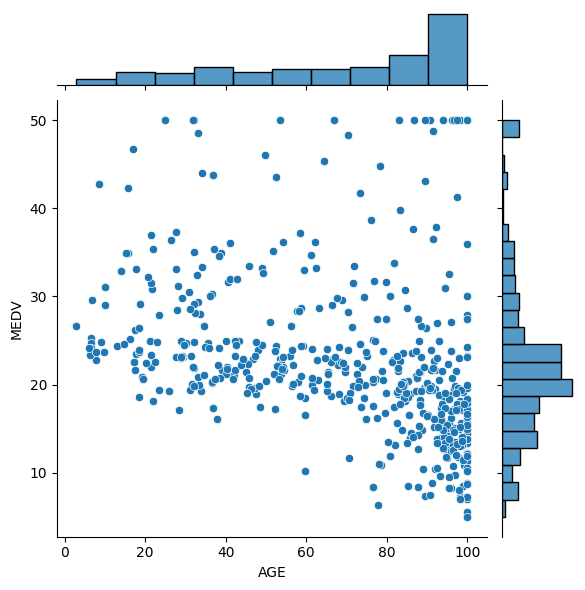

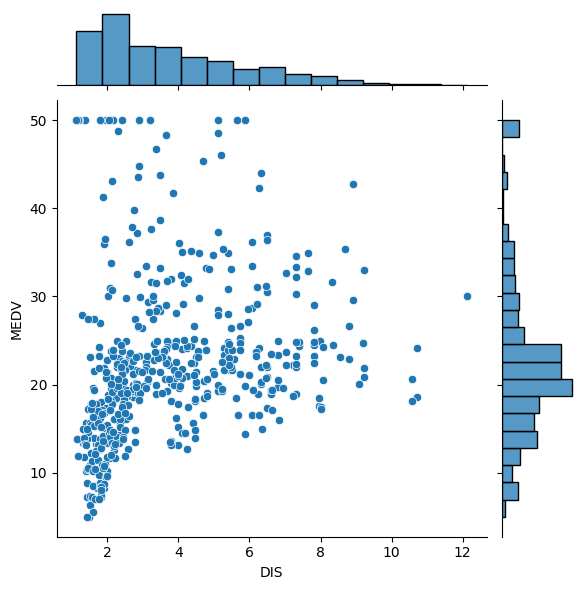

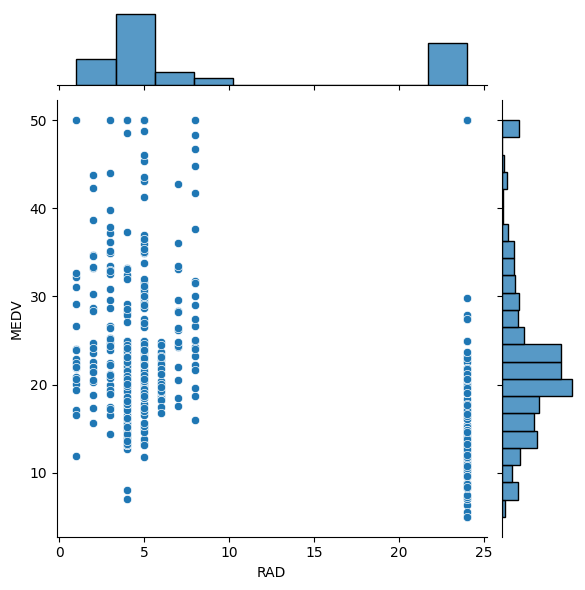

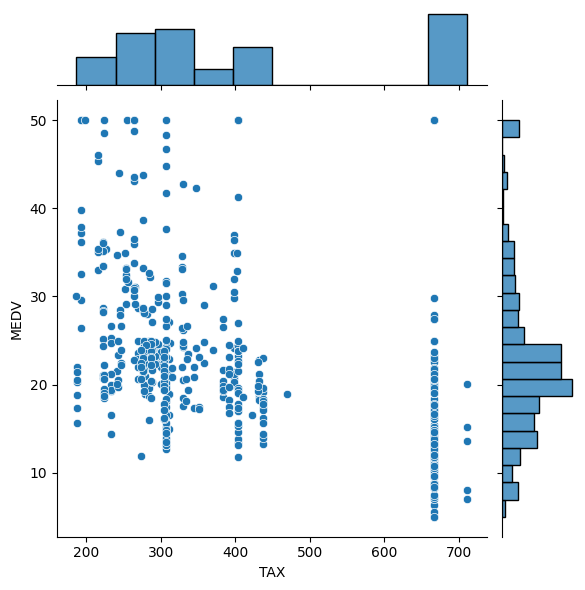

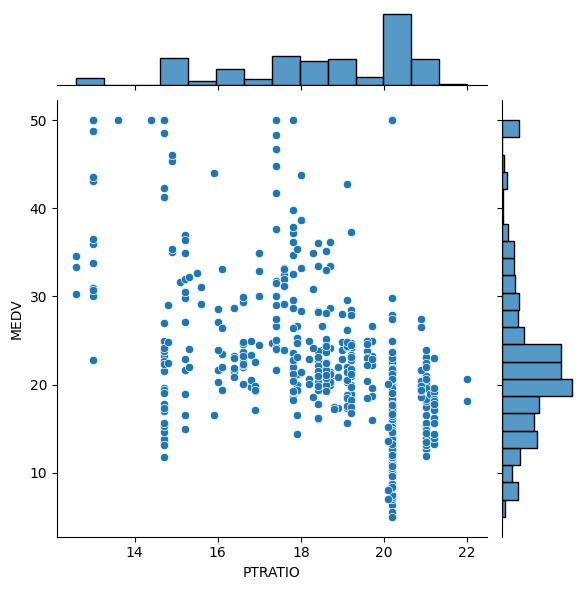

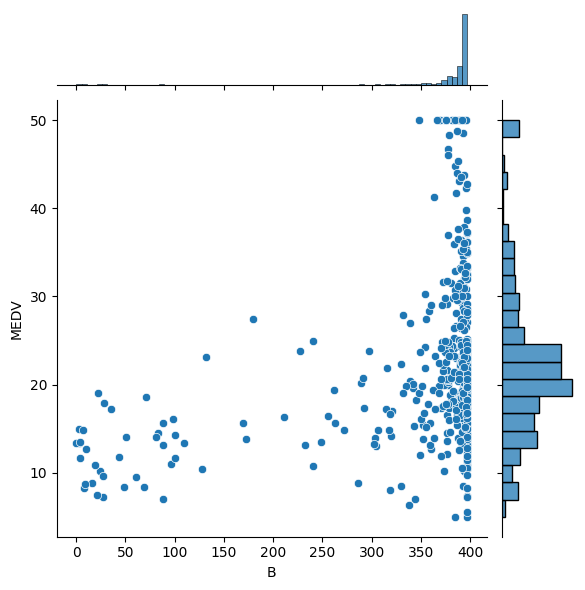

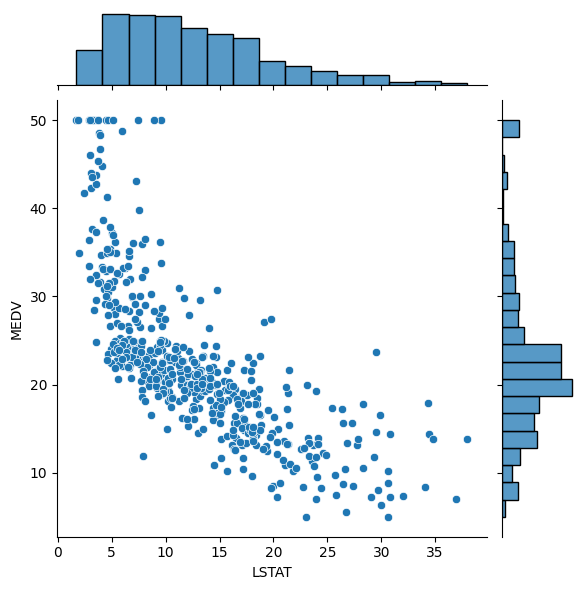

In [93]:
#fig, ax = plt.subplots(2,2)
ydata = boston_data['MEDV']
for i,x in enumerate(boston_data.columns[0:13]):
    sns.jointplot(x = x, y = 'MEDV', data = boston_data)
plt.show()

It seems like the good features are:
PTRATIO, RAD,RM, INDUS,NOX

Those who may need a transformation:
LSTAT, B, DIS,CRIM

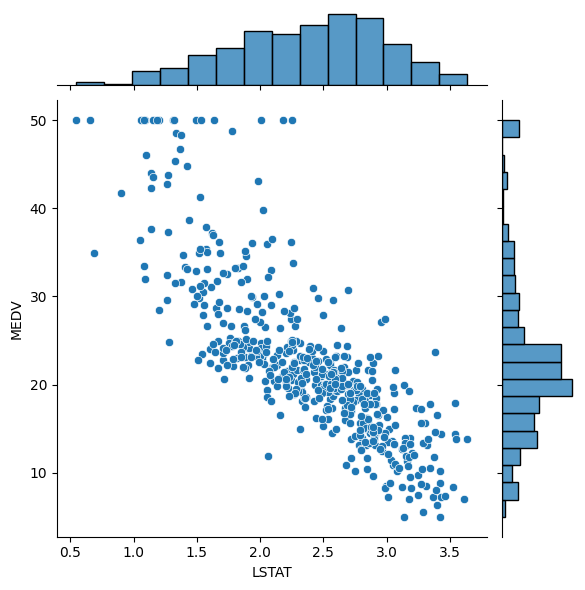

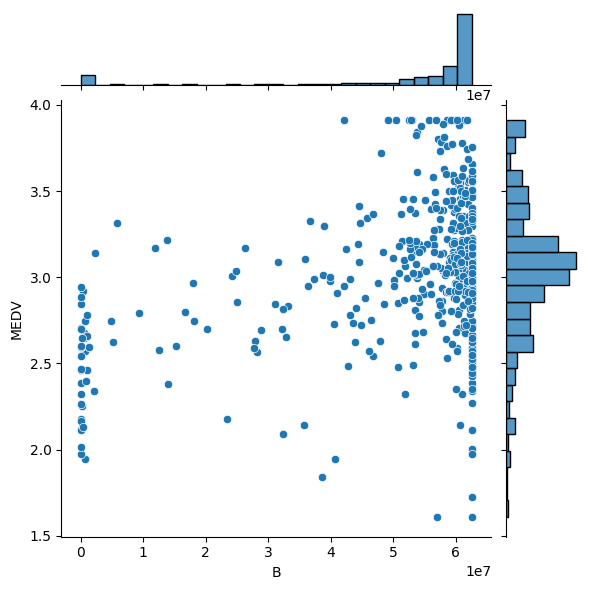

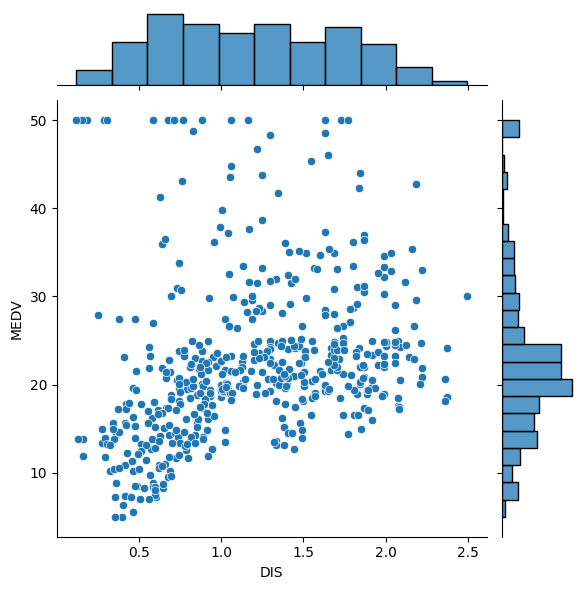

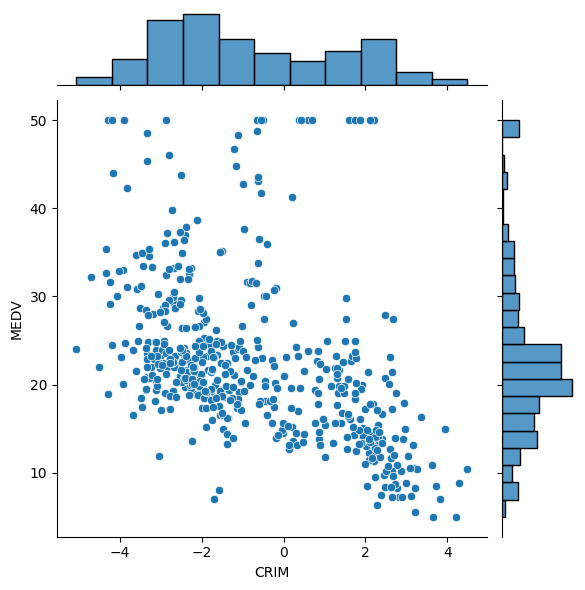

In [94]:
cols_transform = ['LSTAT','B','DIS','CRIM']
for i in cols_transform:
    ydata = boston_data['MEDV']
    xdata = boston_data[i]
    if i != 'B':
        sns.jointplot(x = np.log(xdata), y= ydata)
    else:
        sns.jointplot(x = xdata**3, y= np.log(ydata))
plt.show()

it seems like the features that have good joints are:
log(CRIM), log(LSTAT), PTRATIO, RAD,RM, INDUS,NOX

In [95]:
#lets try to see the correlation between fts and output
#try to get the log values of crime and lstat in the df
for x in ['CRIM','LSTAT']:
    boston_data["log " + x] = np.log(boston_data[x])

cols_needed= ['log CRIM', 'log LSTAT', 'PTRATIO' , 'RAD' ,'RM', 'INDUS','NOX','MEDV']
cols_needed_df = boston_data[cols_needed]
corr_mtx = np.corrcoef(cols_needed_df, rowvar= False)
cols_corr_df = pd.DataFrame(corr_mtx, columns = cols_needed, index = cols_needed)
cols_corr_df


,log CRIM,log LSTAT,PTRATIO,RAD,RM,INDUS,NOX,MEDV
log CRIM,1.000000,0.591796,0.389554,0.853407,-0.306943,0.730821,0.788616,-0.454302
log LSTAT,0.591796,1.000000,0.417022,0.460506,-0.664528,0.597429,0.577072,-0.815442
PTRATIO,0.389554,0.417022,1.000000,0.464741,-0.355501,0.383248,0.188933,-0.507787
RAD,0.853407,0.460506,0.464741,1.000000,-0.209847,0.595129,0.611441,-0.381626
RM,-0.306943,-0.664528,-0.355501,-0.209847,1.000000,-0.391676,-0.302188,0.695360
INDUS,0.730821,0.597429,0.383248,0.595129,-0.391676,1.000000,0.763651,-0.483725
NOX,0.788616,0.577072,0.188933,0.611441,-0.302188,0.763651,1.000000,-0.427321
MEDV,-0.454302,-0.815442,-0.507787,-0.381626,0.695360,-0.483725,-0.427321,1.000000


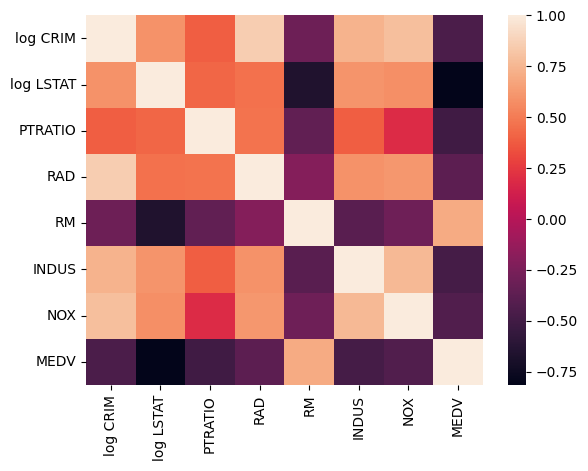

In [97]:
sns.heatmap(cols_corr_df)
plt.show()

there seems to be strong correlation between the features and the output. It seems like RAD has the lowest $|r|$ and the one the highest r with log crim so it might be best to not pick that as a feature to use

thus final features: log(CRIM), log(LSTAT), PTRATIO,RM, INDUS,NOX

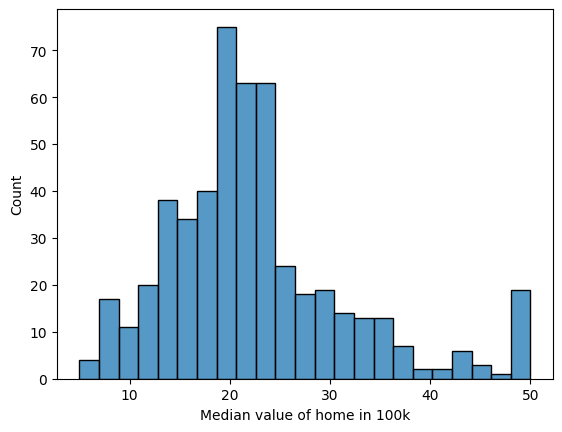

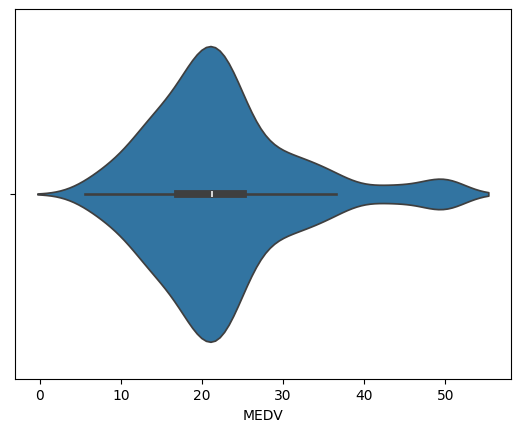

In [67]:
#plot the prices
sns.histplot(boston_data['MEDV'])
#plt.hist(boston_data['MEDV'])
plt.xlabel('Median value of home in 100k')
plt.show()
sns.violinplot(boston_data['MEDV'], orient= 'h')
plt.show()

In [77]:
#there seems to be  major outliers in the higher numbers, lets try to filter out using the IQR
medv_IQR = np.percentile(boston_data['MEDV'],75) - np.percentile(boston_data['MEDV'],25)
medv_upperBound = np.percentile(boston_data['MEDV'],75) + 1.5 * medv_IQR
print(f" the percentage of upper outliers are {np.mean(boston_data['MEDV'].to_numpy() >= medv_upperBound) * 100}")

 the percentage of upper outliers are 7.5098814229249005


# Time to make model

In [84]:
#set up 
fts_matrix = boston_data[['log CRIM', 'log LSTAT', 'PTRATIO','RM', 'INDUS','NOX']]
X_train, X_test, y_train, y_test = train_test_split(fts_matrix, boston_data['MEDV'], test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [86]:
#model with outliers and doing kfold cross val
outliers_model = LinearRegression(fit_intercept= True)
outliers_k_RMSE = cross_val_score(outliers_model, X_train, y_train, cv =kf, scoring= 'neg_root_mean_squared_error')
np.mean(outliers_k_RMSE) * -1

4.857703095994083

In [ ]:
not_outliers = y_train <= upperBound